</br>

# EDA 과제 3. 세계 테러 데이터 분석

</br>

In [1]:
import pandas as pd

terror_raw = pd.read_csv("./globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', low_memory=False)

terror_raw.rename(
	columns={
		'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'latitude': 'lat', 'longitude': 'lng',
  		'country_txt': 'Country', 'city': 'City', 'region_txt': 'Region', 'nkill': 'Killed', 'nwound': 'Wounded',
    	'targtype1_txt': 'Target Type', 'target1': 'Target', 'gname': 'p_group', 'attacktype1_txt': 'Attack Type'
	}, inplace=True
)

columns = [
	'Year', 'Month', 'Day', 'Region', 'Country', 'City', 'lat', 'lng', 'Killed', 'Wounded',
	'Target Type', 'Target', 'p_group', 'Attack Type', 'success', 'ishostkid'
]
terror_raw = terror_raw[columns]
terror_raw.head()

Year  Month  Day                       Region             Country  \
0  1970      7    2  Central America & Caribbean  Dominican Republic   
1  1970      0    0                North America              Mexico   
2  1970      1    0               Southeast Asia         Philippines   
3  1970      1    0               Western Europe              Greece   
4  1970      1    0                    East Asia               Japan   

            City        lat         lng  Killed  Wounded  \
0  Santo Domingo  18.456792  -69.951164     1.0      0.0   
1    Mexico city  19.371887  -99.086624     0.0      0.0   
2        Unknown  15.478598  120.599741     1.0      0.0   
3         Athens  37.997490   23.762728     NaN      NaN   
4        Fukouka  33.580412  130.396361     NaN      NaN   

                   Target Type                   Target  \
0  Private Citizens & Property             Julio Guzman   
1      Government (Diplomatic)  Nadine Chaval, daughter   
2          Journalists & Media                 Employee   
3      Government (Diplomatic)             U.S. Embassy   
4      Government (Diplomatic)           U.S. Consulate   

                              p_group                     Attack Type  \
0                              MANO-D                   Assassination   
1  23rd of September Communist League     Hostage Taking (Kidnapping)   
2                             Unknown                   Assassination   
3                             Unknown               Bombing/Explosion   
4                             Unknown  Facility/Infrastructure Attack   

   success  ishostkid  
0        1        0.0  
1        1        1.0  
2        1        0.0  
3        1        0.0  
4        1        0.0

In [2]:
terror_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Region       181691 non-null  object 
 4   Country      181691 non-null  object 
 5   City         181256 non-null  object 
 6   lat          177135 non-null  float64
 7   lng          177134 non-null  float64
 8   Killed       171378 non-null  float64
 9   Wounded      165380 non-null  float64
 10  Target Type  181691 non-null  object 
 11  Target       181053 non-null  object 
 12  p_group      181691 non-null  object 
 13  Attack Type  181691 non-null  object 
 14  success      181691 non-null  int64  
 15  ishostkid    181513 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 22.2+ MB


In [4]:
terror_raw.loc[terror_raw['Killed'].isnull(), 'Killed'] = 0
terror_raw.loc[terror_raw['Wounded'].isnull(), 'Wounded'] = 0
terror_raw[['Killed', 'Wounded']] = terror_raw[['Killed', 'Wounded']].astype('int64')
terror_raw['Casualties'] = terror_raw['Killed'] + terror_raw['Wounded']
terror_raw.isna().sum()

Year              0
Month             0
Day               0
Region            0
Country           0
City            435
lat            4556
lng            4557
Killed            0
Wounded           0
Target Type       0
Target          638
p_group           0
Attack Type       0
success           0
ishostkid       178
Casualties        0
dtype: int64

In [5]:
terror = terror_raw.copy()

In [8]:
import folium

terror_killed = terror.sort_values('Killed', ascending=False)[:2000]
terror_killed.dropna(subset=['lat','lng'], inplace=True)

map = folium.Map(location=[30,0], tiles='CartoDB dark_matter', zoom_start=2)

for _, row in terror_killed.iterrows():
    info='<b>Country </b>:' + str(row['Country']) + \
            '<br><b>City </b>: ' + str(row['City']) + \
            '<br><b>Killed </b>: ' + str(row['Killed']) + \
            '<br><b>Wounded</b> : ' + str(row['Wounded'])
    iframe = folium.IFrame(html=info, width=200, height=100)
    
    folium.CircleMarker(
		location=[row['lat'], row['lng']],
        popup=folium.Popup(iframe),
        radius=row['Killed']/100, color='red', fill=True, fill_opacity=0.7
    ).add_to(map)
map

In [9]:
success_rate = round(terror['success'].value_counts()[1] / len(terror['success']) * 100, 0)
print(f" 1970-2017 기간 동안 전 세계 테러 발생 건수는 {len(terror)}건 이었고, 테러 성공률은 {success_rate}% 로 상당히 높은 편이다.")

 1970-2017 기간 동안 전 세계 테러 발생 건수는 181691건 이었고, 테러 성공률은 89.0% 로 상당히 높은 편이다.


-----

<br></br>

# 문제 1.

- 먼저 데이터의 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화하시오.

- 시각화를 해보면 전세계 테러는 어떤 특정 연도를 기점으로 갑자기 급격히 증가합니다.</br>
  이 구간을 특정짓고 그 “기점”에 세계적 이슈가 무엇이 있었는지를 추측해보세요.

- 단, 위 추측은 현단계에서는 단지 아직은 “상상”일 뿐입니다.<br></br>

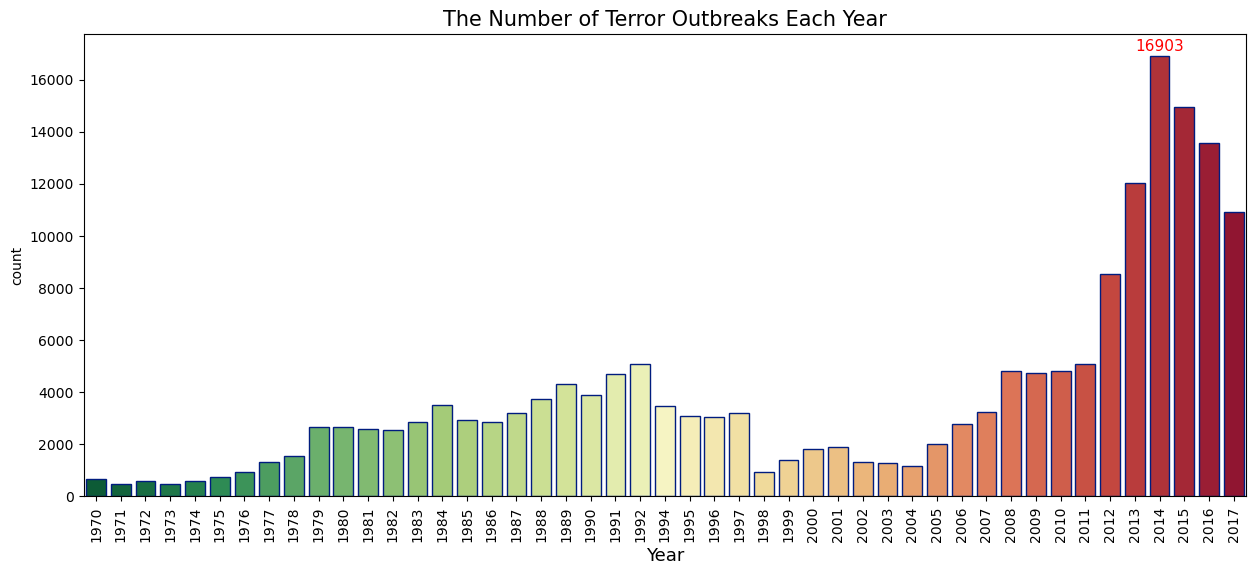

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.countplot(data=terror, x='Year', hue='Year', legend=False, palette='RdYlGn_r', edgecolor=sns.color_palette('dark'))
plt.text(
	x=43, y=terror['Year'].value_counts()[2014]+200, 
 	s=str(terror['Year'].value_counts()[2014]), 
  	ha='center', color='red', fontsize=11
)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=13)
plt.title('The Number of Terror Outbreaks Each Year', fontsize=15)
plt.show()

#### 👉 2014년에 테러가 급증했다.

- 그렇다면 어느 지역에서 갑자기 테러가 급증했는지 알아보자.

In [12]:
terror_region = pd.crosstab(terror.Year, terror.Region)
styled_df = terror_region.style.apply(lambda x: ['background-color: Yellow' if i == 2014 else '' for i in x.index], axis=0)
styled_df

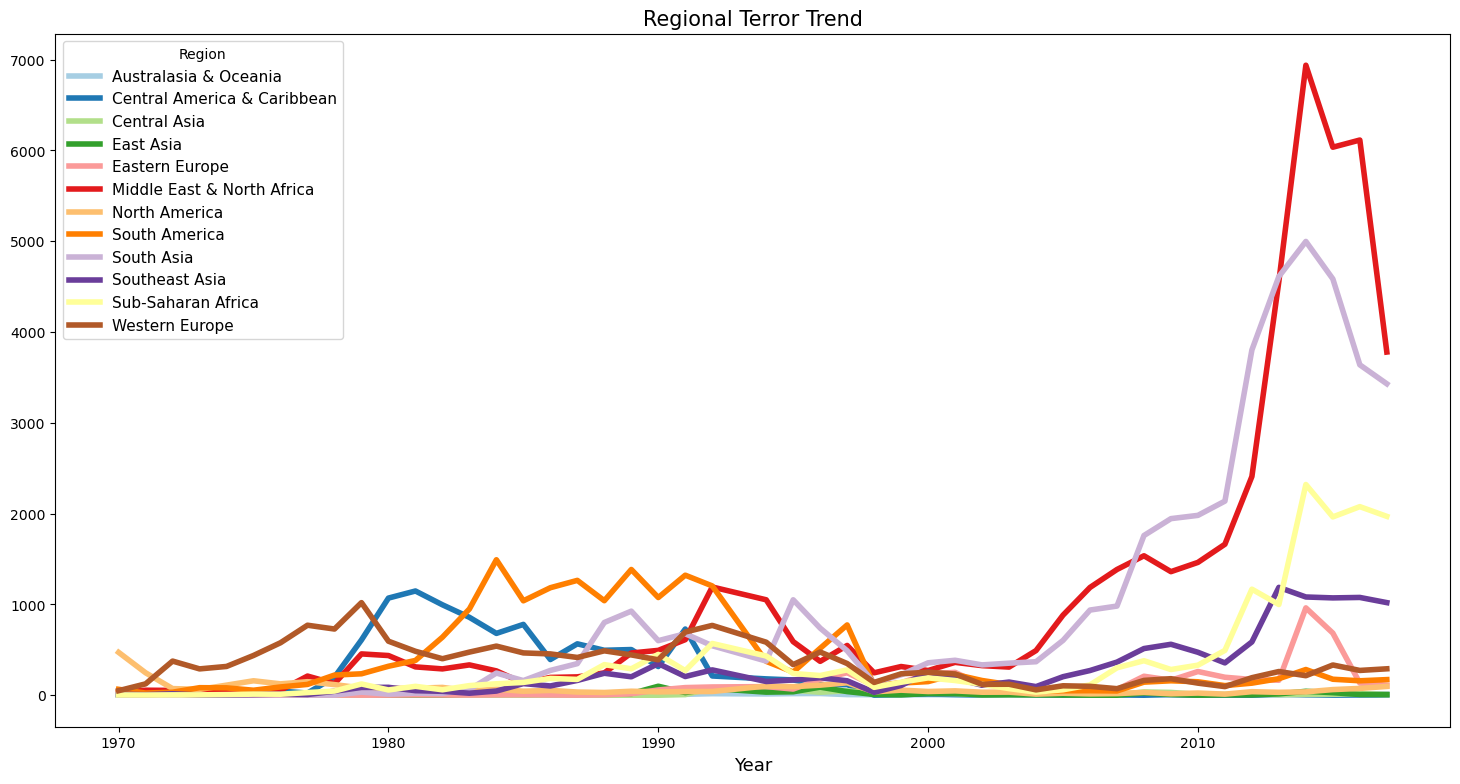

In [45]:
terror_region.plot(color=sns.color_palette('Paired',12), lw=4)
fig = plt.gcf()
fig.set_size_inches(18,9)
plt.legend(title='Region', fontsize=11)
plt.title("Regional Terror Trend", fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.show()

#### 👉 Middle East & North Africa와 South Asia 지역에서 테러 발생 급증

- 2014년에는 시리아 내전이 여전히 진행 중이었고 이라크, 시리아뿐만 아니라 다른 중동 지역에서도 불안정이 계속되었다. </br>
	이러한 중동 지역의 불안정한 상황은 이슬람국가의 $\text{IS, ISIS, ISIL}$과 같은 다양한 극단주의 세력들이 영향력을 키우는 데 주요한 요인이 되었다.

- 2014년에 이슬람국가($\text{IS, ISIS, ISIL}$)가 이라크와 시리아 일부 지역을 점령하고 국제적으로 활동을 확대하면서, 그들의 테러 활동도 증가했다.<br>
	$\text{IS}$의 성장은 중동 지역 전반의 안정을 위협했고, 세계 각지에서 테러 공격을 조장했습니다.

- 이때 유럽의 이슬람 테러리즘 활동이 시작되었고 2014년부터 계속 이어지고 있다.</br>
	유럽에서 테러가 급증한 것은 시리아 내전의 여파로 분류되며 ISIL의 성장과 관련이 있는 것으로 여겨진다.

- 이 기간 중 사하라 이남 아프리카에서는 테러발생 건수가 114 건에서 2,308건으로 거의 20배 이상 증가하여 이 기간 중 테러발생 건수의 증가가 가장 높은 지역이
되었다.<br></br>

-----

<br></br>

# 문제 2.

- 전 세계 테러 데이터를 가지고, 테러가 많이 일어난 국가를 정렬해서 상위 10위의 국가를 시각화하세요.

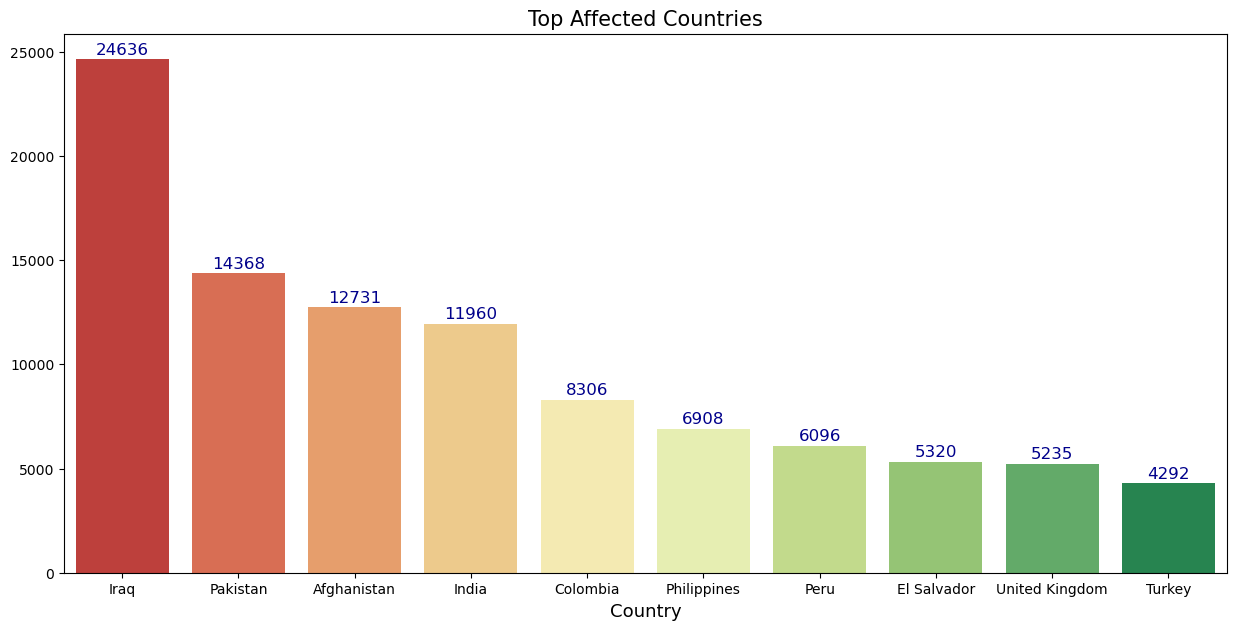

In [15]:
plt.figure(figsize=(15,7))
countries = terror['Country'].value_counts()[:10].index
ax = sns.barplot(
	x=countries, y=terror['Country'].value_counts()[:10].values,
	hue=countries, legend=False, palette='RdYlGn'
)
for p in ax.patches:
    ax.annotate(
		f'{int(p.get_height())}',
  		(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 7), textcoords='offset points',
		fontsize=12, color='darkblue'
	)
plt.title('Top Affected Countries', fontsize=15)
plt.xlabel("Country", fontsize=13)
plt.show()

#### 👉 이라크에서 가장 많은 테러가 발생했다.

- 그 다음으로 많은 테러가 발생한 국가가 파키스탄, 아프가니스탄이다.

- 테러 발생 TOP3가 모두 중동 지역의 국가들이다.<br></br>

-----

<br></br>

# 문제 3.

- 문제2의 전 세계 테러가 일어난 횟수별 상위 10위 국가에 대해 국가별로 사망자 수와 부상자 수를 구분하여 시각화하시오.

- 만약 국가별로 다른 국가와 사망자수, 부상자수의 특성이 다른 국가들이 있다면 시각화에 신경을 쓰세요.

- 즉, 어떤 국가는 테러횟수와 사상자(사망자수+부상자수)가 비슷한 경우가 있고, 또 어떤 국가는 테러횟수에 비해 사상자수가 많은 경우가 있을 겁니다.<br></br>


### ◾ TOP10 국가별 테러 발생 vs 사상자 수

- 먼저 테러 발생 건수와 사상자의 수를 비교해 보면 좋을 것 같다.

In [16]:
TOP10_Country = terror['Country'].value_counts()[:10].to_frame()
TOP10_Country.columns = ['Attacked Count']
TOP10_Country

Attacked Count
Country                       
Iraq                     24636
Pakistan                 14368
Afghanistan              12731
India                    11960
Colombia                  8306
Philippines               6908
Peru                      6096
El Salvador               5320
United Kingdom            5235
Turkey                    4292

In [18]:
cnt_kill_wound = terror.groupby('Country')['Killed'].sum().to_frame().merge(
	terror.groupby('Country')['Wounded'].sum().to_frame(),
 	left_index=True, right_index=True, how='left'
)
cnt_kill_wound.columns = ['Killed Count', 'Wounded Count']
cnt_kill_wound

Killed Count  Wounded Count
Country                                 
Afghanistan         39384          44277
Albania                42            126
Algeria             11066           9150
Andorra                 0              0
Angola               3043           2455
...                   ...            ...
Yemen                8776           9328
Yugoslavia            119            281
Zaire                 324            211
Zambia                 70             62
Zimbabwe              154            222

[205 rows x 2 columns]

In [19]:
TOP10_Casualties = TOP10_Country.merge(cnt_kill_wound, left_index=True, right_index=True, how='left')
TOP10_Casualties['Num of Casualties'] = TOP10_Casualties['Killed Count'] + TOP10_Casualties['Wounded Count']
TOP10_Casualties

Attacked Count  Killed Count  Wounded Count  Num of Casualties
Country                                                                       
Iraq                     24636         78589         134690             213279
Pakistan                 14368         23822          42038              65860
Afghanistan              12731         39384          44277              83661
India                    11960         19341          28980              48321
Colombia                  8306         14698          10328              25026
Philippines               6908          9559          13367              22926
Peru                      6096         12771           4078              16849
El Salvador               5320         12053           5062              17115
United Kingdom            5235          3410           6106               9516
Turkey                    4292          6888           9899              16787

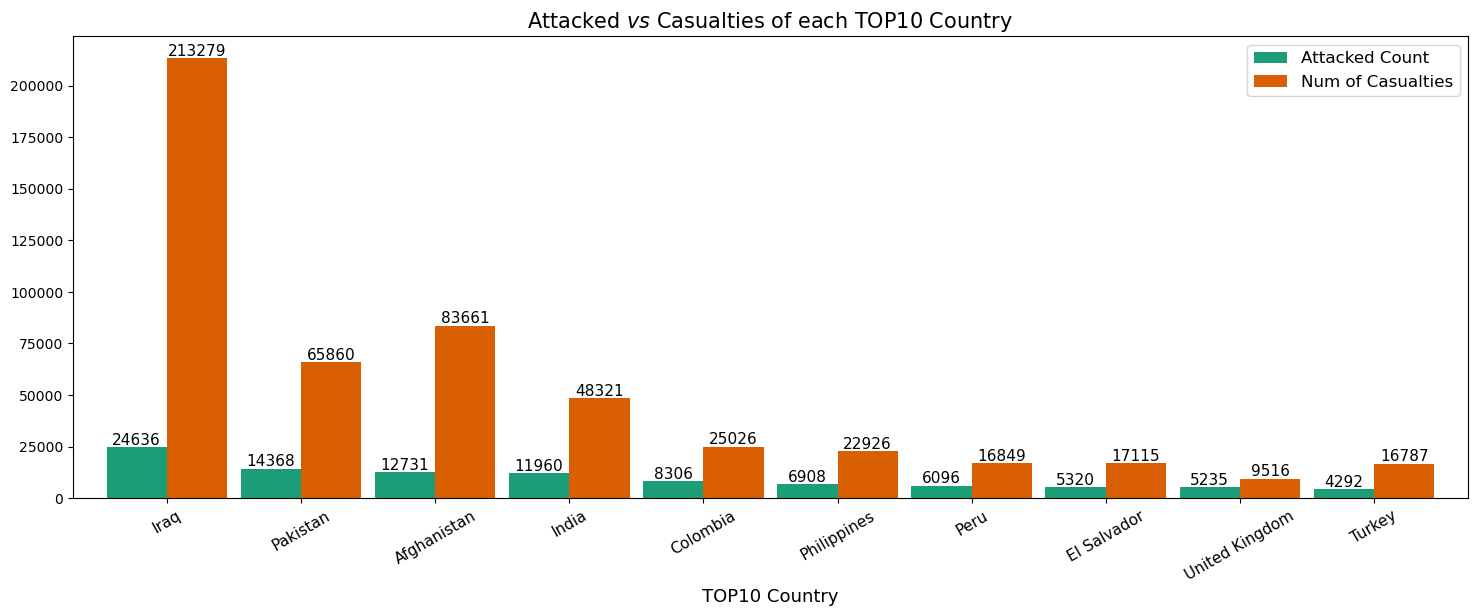

In [20]:
ax = TOP10_Casualties[['Attacked Count','Num of Casualties']].plot.bar(width=0.9, color=sns.color_palette('Dark2'))
for p in ax.patches:
    ax.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2, p.get_height()), xytext=(0,5),
		ha='center', va='center', textcoords='offset points', fontsize=11
	)
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.title("Attacked $vs$ Casualties of each TOP10 Country", fontsize=15)
plt.legend(fontsize=12)
plt.xlabel("TOP10 Country", fontsize=13)
plt.xticks(rotation=30, fontsize=11)
plt.show()

#### 👉 와~~~

- 이라크의 사상자 수는 테러 발생건에 비해 거의 10배 정도 더 많았다.

- 아프가니스탄도 거의 8배 더 높은 수치의 사상자가 발생했고, 파키스탄이나 인도도 대략 4.5배 더 많았다.

- 그만큼 민간인 사상자가 많았다는 의미일까??? 그럼 어떤 공격 형태에서 가장 많은 사상자가 나는 걸까???

- 나라별 사망자 수와 부상자 수로 세분화하여 일단 살펴보자.<br></br>


### ◾ TOP10 국가별 사망자 수 vs 부상자 수

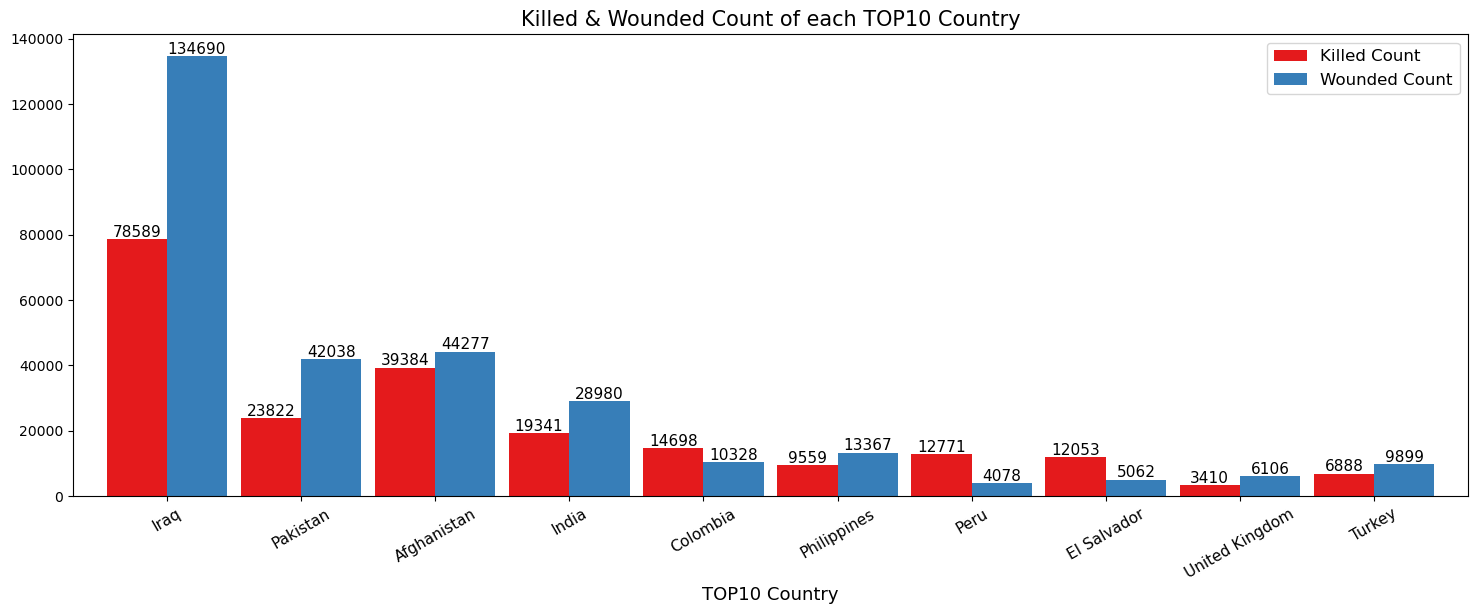

In [22]:
ax = TOP10_Casualties[['Killed Count','Wounded Count']].plot.bar(width=0.9, color=sns.color_palette('Set1'))
for p in ax.patches:
    ax.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2, p.get_height()), xytext=(0,5),
		ha='center', va='center', textcoords='offset points', fontsize=11
	)
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.title("Killed & Wounded Count of each TOP10 Country", fontsize=15)
plt.legend(fontsize=12)
plt.xlabel("TOP10 Country", fontsize=13)
plt.xticks(rotation=30, fontsize=11)
plt.show()

#### 👉 사망자의 수가 유독 많은 국가가 있다.

- 이라크가 테러 발생 건수와 비례하여 가장 높은 사망자 수와 부상자 수를 보이고 있다.

- 페루와 엘살바도르는 사망자의 수가 부상자에 비해 상대적으로 높게 나타나고 있다. 

	그 이유가 뭘까? </br>
	공격 타입에 따른 사상자 수와 이 두 국가에서 발생한 테러의 공격 타입을 좀 더 살펴보면 좋을 것 같다. <br></br>


### ◾ TOP10 국가별 공격 형태 vs 사상자 수

In [26]:
attack_type_casualties = terror['Attack Type'].value_counts().to_frame(name='Attack Count').merge(
	terror.groupby('Attack Type')['Casualties'].sum().to_frame(),
	left_index=True, right_index=True, how='left'
)
attack_type_casualties

Attack Count  Casualties
Attack Type                                                  
Bombing/Explosion                           88255      530007
Armed Assault                               42669      237662
Assassination                               19312       38807
Hostage Taking (Kidnapping)                 11158       30677
Facility/Infrastructure Attack              10356        7407
Unknown                                      7276       47106
Unarmed Assault                              1015       14907
Hostage Taking (Barricade Incident)           991        8444
Hijacking                                     659       20719

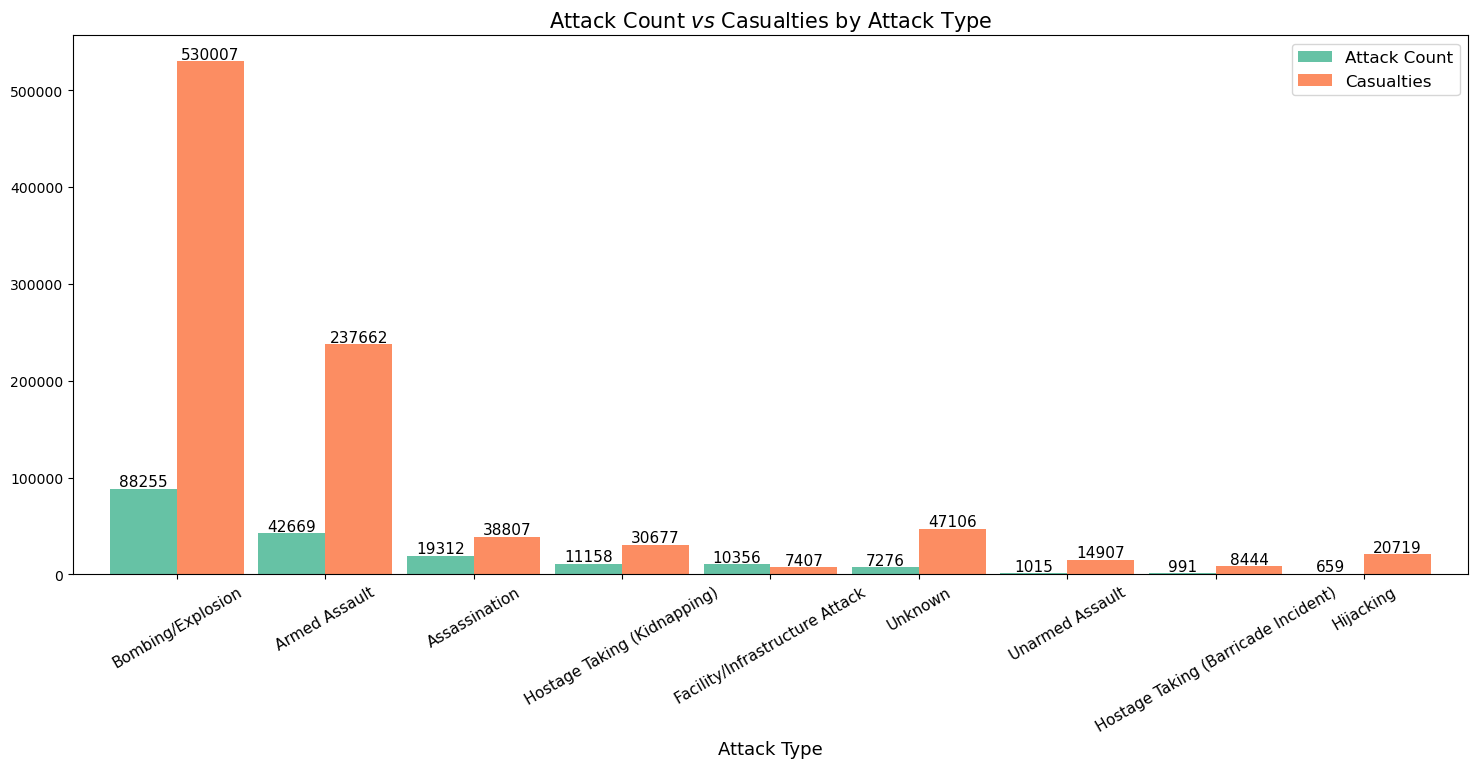

In [27]:
ax = attack_type_casualties.plot.bar(y=['Attack Count', 'Casualties'], width=0.9, color=sns.color_palette('Set2'))
for p in ax.patches:
    ax.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2, p.get_height()), xytext=(0,5),
		ha='center', va='center', textcoords='offset points', fontsize=11
	)
fig = plt.gcf()
fig.set_size_inches(18,7)
plt.title("Attack Count $vs$ Casualties by Attack Type", fontsize=15)
plt.legend(fontsize=12)
plt.xlabel("Attack Type", fontsize=13)
plt.xticks(rotation=30, fontsize=11)
plt.show()

#### 👉 폭발물에 의한 사상자 수가 굉장히 높다.

- 폭탄과 같은 폭발물이나 무장 공격, 암살에 의한 사망자 수가 높다.

- 인질로 인한 사상자 수도 발생건에 비해 높은 비율을 나타내고 있다.

- 그럼 TOP10 국가 별 공격 받은 형태에 대해 한 번 살펴보자. <br></br>


### ◾ TOP10 국가 별 공격 형태

In [28]:
attack_df = terror[terror['Country'].isin(TOP10_Country.index)]
country_attack_type = pd.crosstab(attack_df.Country, attack_df['Attack Type'])
country_attack_type

Attack Type     Armed Assault  Assassination  Bombing/Explosion  \
Country                                                           
Afghanistan              2877            954               6245   
Colombia                 1972           1343               3128   
El Salvador              2216            449               2055   
India                    3184           1229               4825   
Iraq                     3155           1287              18286   
Pakistan                 3859           1406               7613   
Peru                     1328           1002               3115   
Philippines              2158           1099               2213   
Turkey                   1289            437               1957   
United Kingdom            670           1651               2092   

Attack Type     Facility/Infrastructure Attack  Hijacking  \
Country                                                     
Afghanistan                                355         16   
Colombia                                   275         33   
El Salvador                                194          0   
India                                      996         43   
Iraq                                       154         13   
Pakistan                                   300         19   
Peru                                       223          8   
Philippines                                452         34   
Turkey                                     279         13   
United Kingdom                             652         19   

Attack Type     Hostage Taking (Barricade Incident)  \
Country                                               
Afghanistan                                      27   
Colombia                                         89   
El Salvador                                     117   
India                                            44   
Iraq                                             24   
Pakistan                                         35   
Peru                                             74   
Philippines                                      53   
Turkey                                           13   
United Kingdom                                   14   

Attack Type     Hostage Taking (Kidnapping)  Unarmed Assault  Unknown  
Country                                                                
Afghanistan                            1011               73     1173  
Colombia                               1058               14      394  
El Salvador                             154                1      134  
India                                  1184              143      312  
Iraq                                    946                6      765  
Pakistan                                823               77      236  
Peru                                     97                4      245  
Philippines                             602                4      293  
Turkey                                  158               10      136  
United Kingdom                           53               46       38

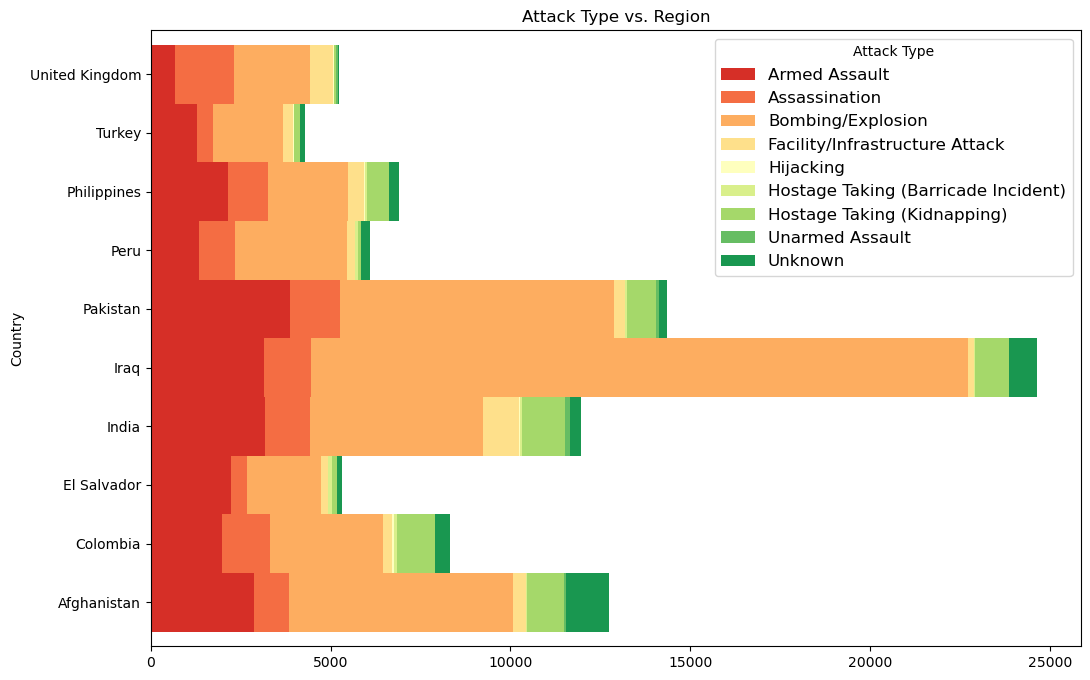

In [29]:
country_attack_type.plot.barh(stacked=True, width=1, color=sns.color_palette('RdYlGn',9))
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.title('Attack Type vs. Region')
plt.legend(title='Attack Type', fontsize=12)
plt.show()

#### 👉 TOP3 Attack : 폭발물, 무장 공격, 암살

- 페루와 엘살바도르에 가해진 테러 공격 형태의 90% 정도가 사상자 수를 가장 많이 내는 TOP3의 공격 형태였다.

- 페루의 경우 폭발물에 의한 공격 형태가 대부분이여서 사망자의 수가 많았던 것 같다.

- 공격에 10배 이상의 사상자를 기록한 이라크의 경우에도 폭발물에 의한 공격이 거의 70% 이상이었다.

-----

<br></br>

# 문제 4.

- 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여</br>
	각 지역별로 테러 공격 형태, 사망자와 사상자의 수 등에 대해 각 지역별로 특성들이 있는지를 확인하세요.

- 여러분들은 데이터를 충분히 관찰하며서 신중하게 결과를 정리하세요.<br></br>


### ◾ 지역 별 테러 발생 건수 vs 사상자 수

- 일단 지역별로 얼마나 테러가 발생했고 또 얼마나 많이 죽고 다쳤는지 비교해서 확인해 본다.

In [30]:
cnt_region = terror['Region'].value_counts().to_frame(name='Attack Count')
cnt_casualties = terror.groupby('Region')['Casualties'].sum().to_frame(name='Num of Casualties')
cnt_casualties.sort_values('Num of Casualties', ascending=False, inplace=True)

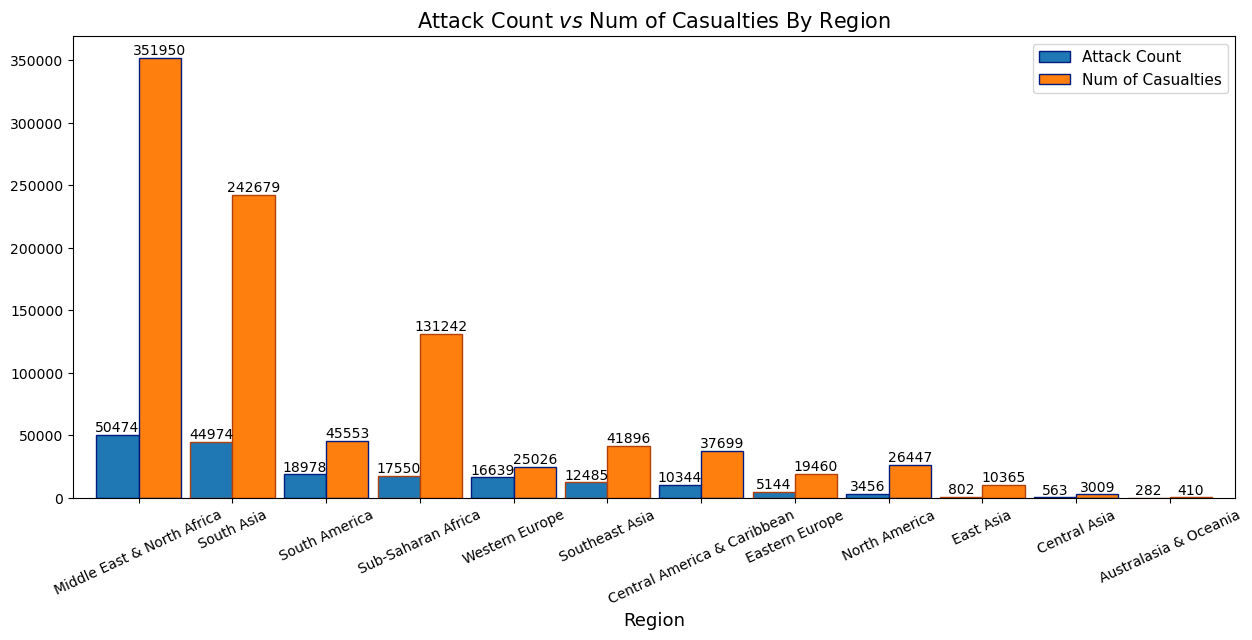

In [31]:
ax = cnt_region.merge(
	cnt_casualties, left_index=True, right_index=True, how='left'
).plot.bar(width=0.9, edgecolor=sns.color_palette('dark', 2))
for p in ax.patches:
    ax.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2., p.get_height()),
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points'
	)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.title("Attack Count $vs$ Num of Casualties By Region", fontsize=15)
plt.legend(fontsize=11)
plt.xticks(rotation=25)
plt.xlabel('Region', fontsize=13)
plt.show()

#### 👉 사상자 수와 비교하니 테러발생 수가 거의 안보인다.

- 사상자 수에 비하면 테러 발생 건수는 상대적으로 아주 낮다.

- 지역별 테러 발생 건수만 따로 시각화 해보자.

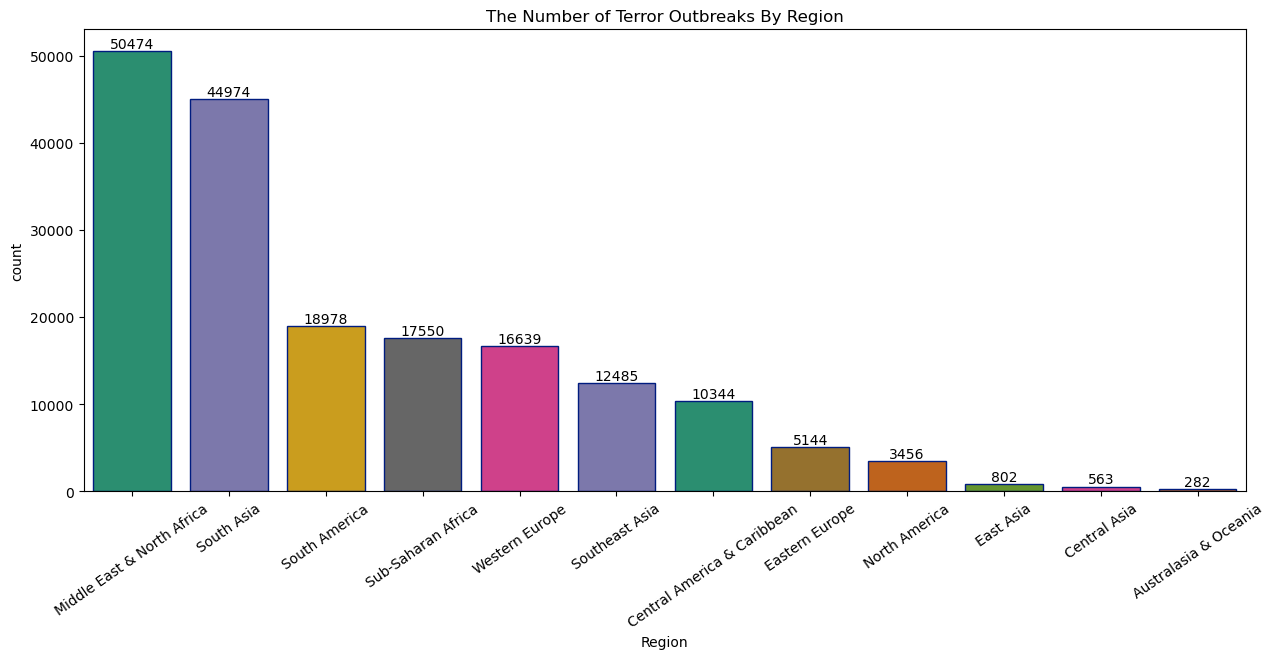

In [32]:
plt.figure(figsize=(15,6))
ax = sns.countplot(
	x='Region', data=terror, hue='Region', legend=False, palette='Dark2',
	edgecolor=sns.color_palette('dark'),
	order=terror['Region'].value_counts().index
)
for p in ax.patches:
    ax.annotate(
		f'{int(p.get_height())}',
  		(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points'
	)
plt.xticks(rotation=35)
plt.title('The Number of Terror Outbreaks By Region')
plt.show()

#### 👉 중동은 주요 테러 지역이다.

- Middle East & North Afraca와 South Asia의 테러 발생 수가 높은 것은 </br>
	1번 문제에서 봤던 2014년의 해당 지역에 대한 테러의 급격한 증가와 관계가 있어 보인다.<br></br>


### ◾ 지역 별 공격 형태

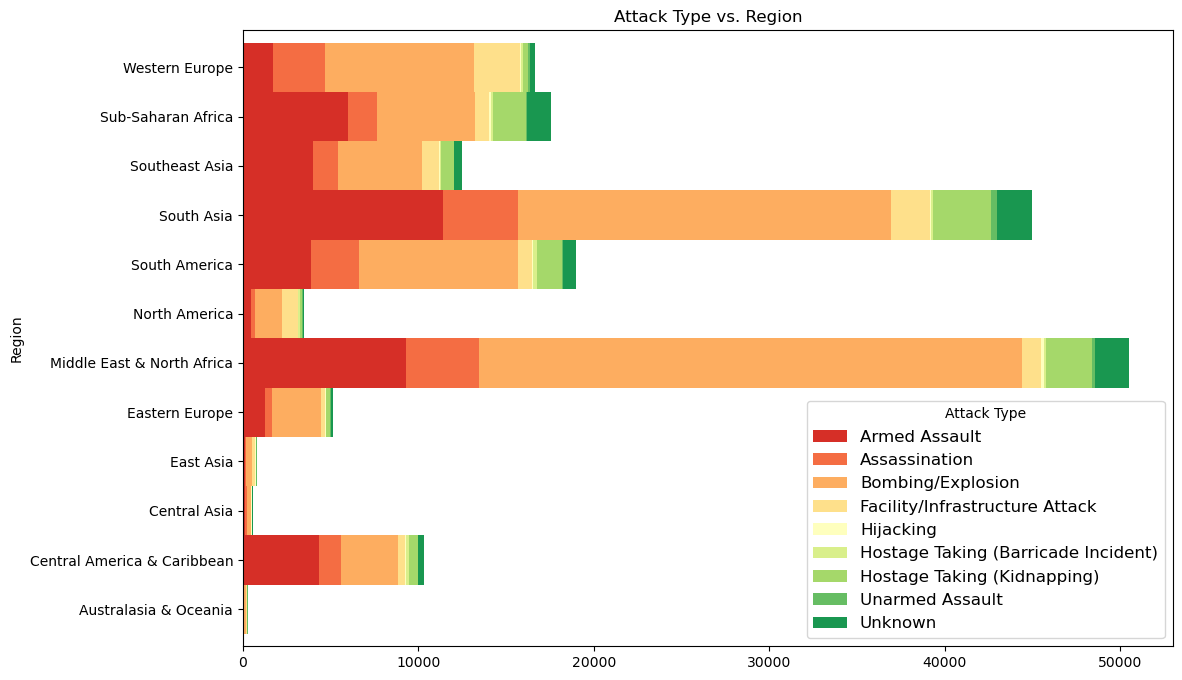

In [42]:
pd.crosstab(terror.Region, terror['Attack Type']).plot.barh(stacked=True, width=1, color=sns.color_palette('RdYlGn', 9))
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.title('Attack Type vs. Region')
plt.legend(title='Attack Type', fontsize=12)
plt.show()

#### 👉 TOP3 공격 형태

- 폭격이나 폭탄에 의한 폭발 형태의 공격과 무장 공격이 전 지역 전반적으로 아주 두드러지게 나타나고 있다.

- 특히 2014년에 테러가 급증했던 중동&북아프리카와 남아시아 지역에서의 공격 형태는</br>
	폭격/폭발, 무장 공격, 암살 세 가지가 거의 90% 정도를 차지할 정도로 독보적이다.

- 그렇다면 사상자의 변화 추이는 어떠했을까??? </br>
	2014년에 급증했던 테러와 공격의 형태가 사상자의 수 변화에 영향을 주었을까???

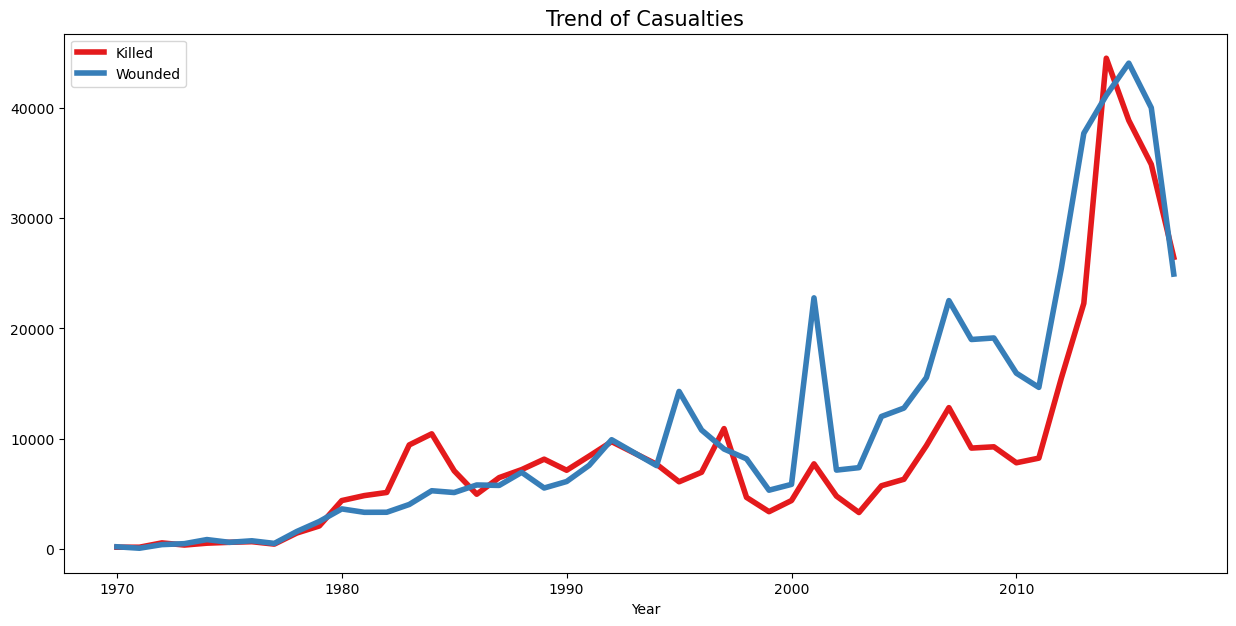

In [51]:
terror.groupby('Year')[['Killed', 'Wounded']].sum().plot(color=sns.color_palette('Set1'), lw=4)
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.title("Trend of Casualties", fontsize=15)
plt.show()

#### 👉 사상자의 수도 2014년에 피크

- 전반적으로 계속 테러에 의한 사상자는 늘어나고 있다.

- 피크 지점인 2014년에는 사망자의 수가 부상자의 수를 넘는 추세도 보이고 있다.

- 공격 형태가 폭격/폭탄, 무장 공격이 대부분이었기 때문에 그만큼 사상자의 수도 많았던 것 같다.<br></br>

-----

<br></br>

# 문제 5.

- 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 진행한 문제4번에 대해</br>
	문제1번에서 특정 지은 시기를 기준으로 다시 분리하여 테러의 양상을 분석해 보시오.

- 그리고 본인의 분석결과를 제시하시오.

In [34]:
terror_date = terror[terror['Year']>2012]
terror_date['Date'] = pd.to_datetime(
	terror_date['Year'].astype(str) + '-' + terror_date['Month'].astype(str), format='%Y-%m'
)

C:\Users\happy\AppData\Local\Temp\ipykernel_24440\3846908934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_date['Date'] = pd.to_datetime(


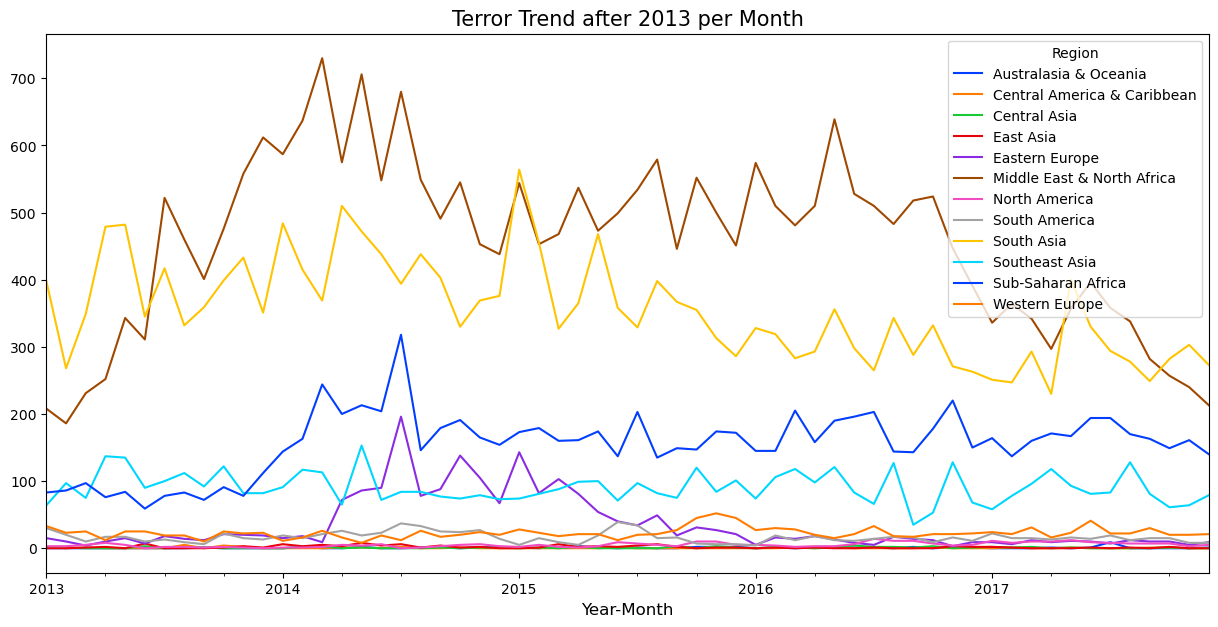

In [60]:
pd.crosstab(terror_date.Date, terror_date.Region).plot(color=sns.color_palette('bright',12))
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.title("Terror Trend after 2013 per Month", fontsize=15)
plt.xlabel("Year-Month", fontsize=12)
plt.show()

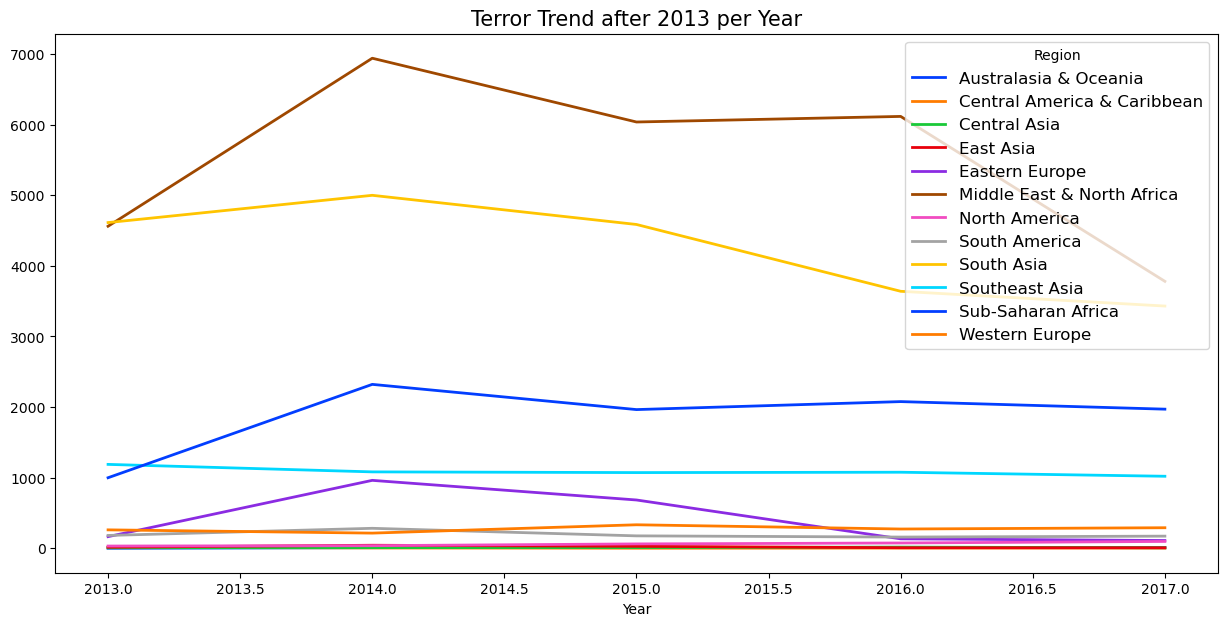

In [59]:
pd.crosstab(terror_date.Year, terror.Region).plot(color=sns.color_palette('bright',12), lw=2)
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.title("Terror Trend after 2013 per Year", fontsize=15)
plt.legend(title='Region', fontsize=12)
plt.show()

#### 👉 전반적으로 유지 또는 감소

- 2014년에 정점을 찍었던 두 지역은 테러 발생이 감소하는 추세이고,

- 다른 지역들은 큰 변화없이 꾸준히 테러가 발행하고 있다.<br></br>

-----

<br></br>

# 문제 6.

- 중동&북아프리카, 남아시아, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여</br>
	70년대, 80년대, 90년대, 2000년대, 2010년대로 구분하여 특성을 분석해 보시오.

In [55]:
def trans_years(x):
    if x >= 1970 and x < 1980:
        return 1970
    elif x >= 1980 and x < 1990:
        return 1980
    elif x >= 1990 and x < 2000:
        return 1990
    elif x >= 2000 and x < 2010:
        return 2000
    else:
        return 2010    

terror['Years'] = terror['Year'].apply(trans_years)

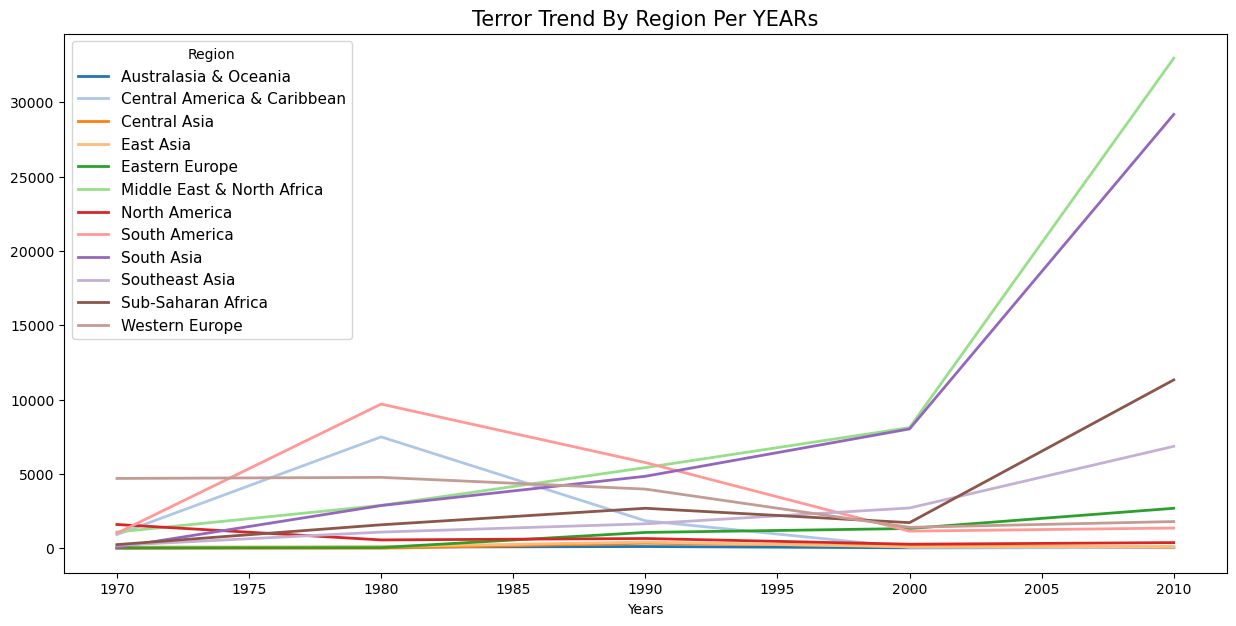

In [61]:
pd.crosstab(terror.Years, terror.Region).plot(color=sns.color_palette('tab20',12), lw=2)
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.title("Terror Trend By Region Per YEARs", fontsize=15)
plt.legend(title='Region', fontsize=11)
plt.show()

#### 👉 연대별로 테러 발생의 주된 지역이 변하고 있다.

- 80년대에 남아메리카와 중앙아메리카 지역에서 주로 테러가 발생하였다.

- 중동&북아프리카와 남아시아, 그리고 사하라 사막 이남의 아프리카 지역에서 2000년대를 기점으로 가파르게 상승하는 것을 볼 수 있다.

- 그렇다면 시대별로 활동하는 테러 단체는 동일했을까??? 아니면 달랐을까???

In [64]:
len(terror['p_group'].unique())

3537

#### 👉 테러 단체가 3천 개가 넘는다.

- 이렇게나 많은 테러 단체가 있을 것이라고는 생각을 하지 못했다.

- 가장 활발한 TOP 10개 테러 단체의 활동에 대해 좀 더 살펴보자.

In [66]:
top10_group = terror[terror['p_group'].isin(terror['p_group'].value_counts()[1:11].index)]

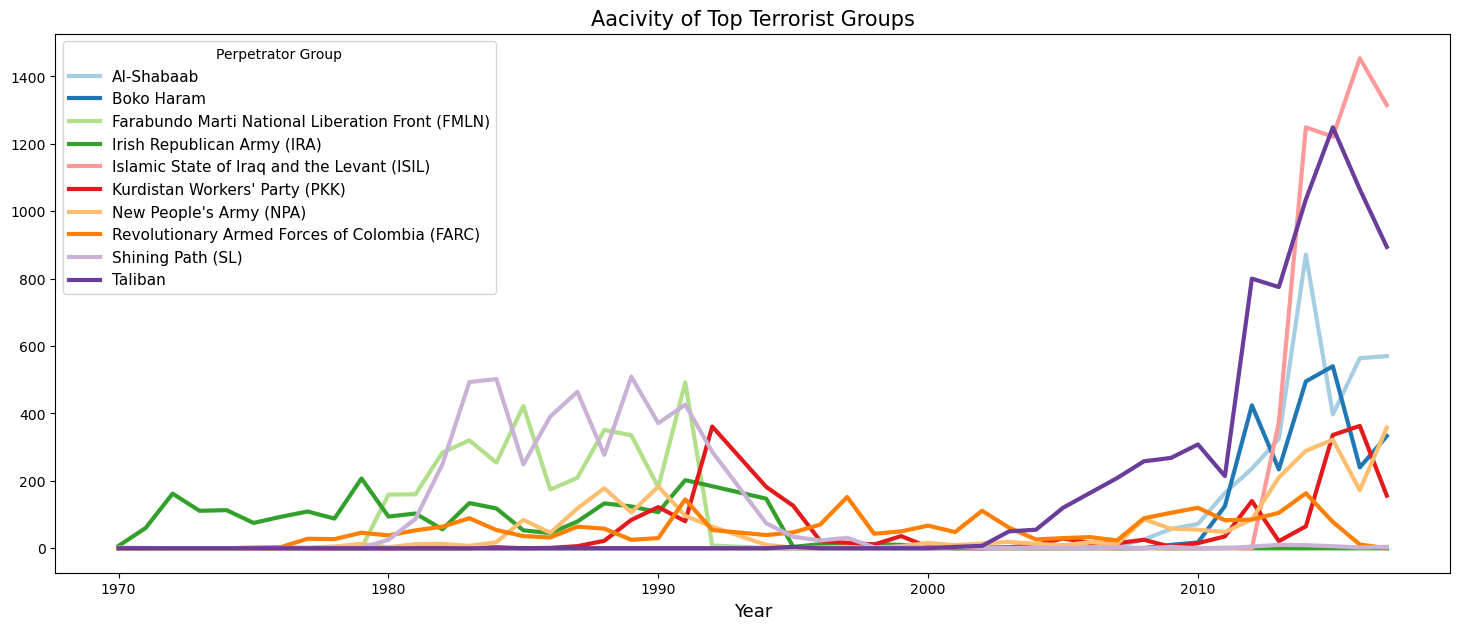

In [68]:
pd.crosstab(top10_group.Year, top10_group.p_group).plot(color=sns.color_palette('Paired'), lw=3)
fig = plt.gcf()
fig.set_size_inches(18,7)
plt.legend(title='Perpetrator Group', fontsize=11)
plt.title("Aacivity of Top Terrorist Groups", fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.show()

#### 👉 시대별 경향과 무장 단체들의 활동 흐름이 유사하다.

- Irish Republican Army(IRA)는 70년대에 활동했던 가장 오래된 테러 단체로 보인다.</br>
	90년대 중반까지 활동하다가 그 이후 거의 활동을 하지 않는 것으로 보인다.

- 80년대에 Shining Path (SL)과 FMLN 단체가 활발히 활동했는데 </br>
	위 지역별 그래프와 같이 보면 80년대에 남아메리카와 중앙아메리카 지역에서의 테러 발생 증가에 영향을 준 단체로 보여진다.

- 2010년 이후부터 활동이 급증한 ISIL, Taliban, Al-Shabaab, 등은 </br>
	위 지역별 그래프의 2000년대 이후 중동&북아프리카와 남아시아, 그리고 사하라 사막 이남의 아프리카 지역에서 급증과 연관이 있어 보인다.

- 1번 문제에서 테러 발생 피크를 보였던 2014년에 대해 조사한 결과과 부합함을 볼 수 있다.<br></br>

-----

<br></br>

# 문제 7.

- 우리나라의 테러를 집계해서 나름대로의 방법으로 시각화 및 분석을 수행하시오.

In [69]:
terror_kor = terror[terror['Country']=='South Korea']

### ◾ 시대 별 테러 발생 수

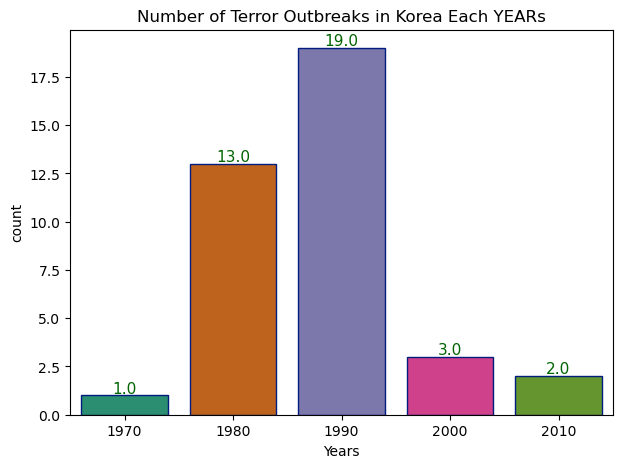

In [71]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data=terror_kor, x='Years', hue='Years', legend=False, palette='Dark2', edgecolor=sns.color_palette('dark',5))
for p in ax.patches:
    ax.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2., p.get_height()),
		xytext=(0,5), ha='center', va='center', textcoords='offset points', fontsize=11, color='darkgreen'
	)
plt.title('Number of Terror Outbreaks in Korea Each YEARs')
plt.show()

#### 👉 80-90년도에 집중 발생

- 우리나라에서는 이념이 한창 어지러웠던 80-90년에 테러가 주로 발생했다.<br></br>


### ◾ 시대 별 사상자 수

In [77]:
kor_df = terror_kor.groupby('Years')[['Killed', 'Wounded']].sum().merge(
	terror_kor['Years'].value_counts().to_frame(name='Attacks'),
	left_index=True, right_index=True, how='left'
)
kor_df['Casualties'] = kor_df['Wounded'] + kor_df['Killed']
kor_df

Killed  Wounded  Attacks  Casualties
Years                                      
1970        1        0        1           1
1980        7       37       13          44
1990        2       33       19          35
2000        0       63        3          63
2010        0        1        2           1

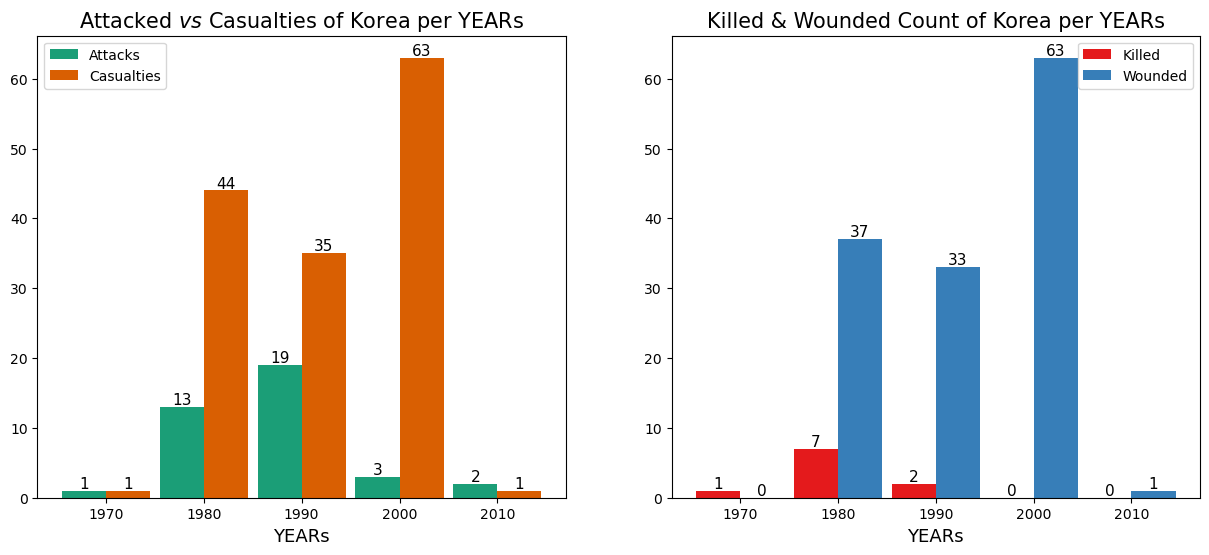

In [80]:
f, axs = plt.subplots(1, 2, figsize=(15,6))

ax1 = kor_df[['Attacks', 'Casualties']].plot.bar(width=0.9, color=sns.color_palette('Dark2'), ax=axs[0])
for p in ax1.patches:
    ax1.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2, p.get_height()), xytext=(0,5),
		ha='center', va='center', textcoords='offset points', fontsize=11
	)

ax2 = kor_df[['Killed','Wounded']].plot.bar(width=0.9, color=sns.color_palette('Set1'), ax=axs[1])
for p in ax2.patches:
    ax2.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2, p.get_height()), xytext=(0,5),
		ha='center', va='center', textcoords='offset points', fontsize=11
	)

axs[0].set_title("Attacked $vs$ Casualties of Korea per YEARs", fontsize=15)
axs[0].set_xlabel("YEARs", fontsize=13)
axs[0].set_xticklabels(kor_df.index, rotation=0)
axs[1].set_title("Killed & Wounded Count of Korea per YEARs", fontsize=15)
axs[1].set_xlabel("YEARs", fontsize=13)
axs[1].set_xticklabels(kor_df.index, rotation=0)

plt.show()

#### 👉 70s 1개??

- 70년대에 기록된 한 건의 1974년 8월 15일 박정희 대통령의 암살을 시도한 대통령 암살 미수 사건이자 영부인 육영수 여사가 살해당한 전대미문의 사건이다.

- 70년대를 조사 하다가 알게된 테러가 있었다.

	- 같은 날에 발생한 1974년 8월 15일 자유한국당 대회 폭탄 테러 사건이다.</br>
		육영수 여사의 암살 서건에 가려진 것일까?? 이 사건으로 6명이 사망하고 17명이 부상을 입었는데도 기록에는 빠져있다.

- 2000년대에는 3건의 테러가 있었는데 60명이 넘는 사상자가 났다. 무슨일이 있었던 것일까??

	- 2003년 11월 7일 부산에서 "부산 서부구치소 죄수 살인사건"이 있었다.<br>
		수감자가 총기를 탈취해 간수들을 습격하여 경비원과 관리소장을 포함한 16명을 살해한 사건으로 나와 있다.</br>
		여기도 기록엔 부상자 60명으로 되어 있는 데 실제로는 사망자도 있었던 것 같다.

#### 👉 우리나라는 사망자 수가 많지 않다.

- 중동의 이라크나 파키스탄과 같이 극단적인 나라들과 비교하면 참 다행서런 수치로 보여진다.

- 데이터 상으로는 2000년대 이후 테러로 인한 사망자는 없다.<br></br>

-----

<br></br>

# 문제 8.

- 불특정 민간인을 대상으로 한 테러는 “악”이라고 할 수 있습니다.

- 이런 테러의 어둡고 무서운 면을 강조할 수 있는 방법을 고민하여 데이터를 분석하고 시각화하여 제시하시오.<br><br>


### ◾ 테러의 주요 타겟

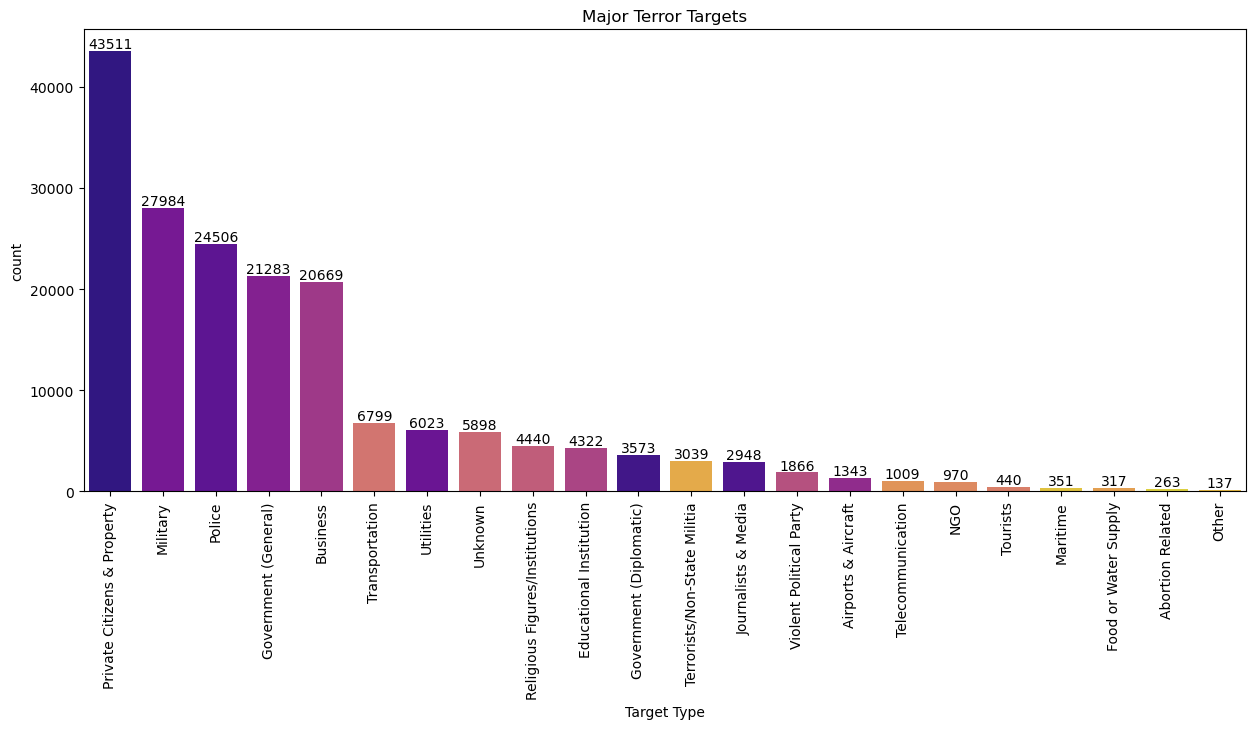

In [81]:
plt.figure(figsize=(15,6))
ax = sns.countplot(
	x='Target Type', data=terror,
	hue='Target Type', legend=False, palette='plasma',
	order=terror['Target Type'].value_counts().index
)
for p in ax.patches:
    ax.annotate(
		f'{int(p.get_height())}',
  		(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points'
	)
    
plt.xticks(rotation=90)
plt.title("Major Terror Targets")
plt.show()

#### 👉 주요 타겟이 민간인??

- 타겟 유형에서 가장 많은 빈도수를 차지하는 것이 민간인과 개인재산이다.

- 그 다음 주요 타겟인 군대와도 수치적으로 비교했을 때 월등히 많은 수를 차지하고 있다는 점이 좀 놀랍기도 하다.

- 그렇다면 민간인의 사상자 수는 전체 대비 얼마나 될까?

In [86]:
target_type_10 = terror.groupby('Target Type')['Casualties'].sum().to_frame().sort_values(by='Casualties', ascending=False)[:10]
target_type_10['Ratio'] = target_type_10['Casualties']/terror['Casualties'].sum() * 100
target_type_10

Casualties      Ratio
Target Type                                          
Private Citizens & Property         319175  34.109514
Military                            177085  18.924675
Police                              118407  12.653890
Business                             78018   8.337608
Government (General)                 67255   7.187390
Transportation                       54595   5.834445
Religious Figures/Institutions       37890   4.049219
Terrorists/Non-State Militia         17311   1.849988
Educational Institution              13972   1.493156
Government (Diplomatic)              13398   1.431814

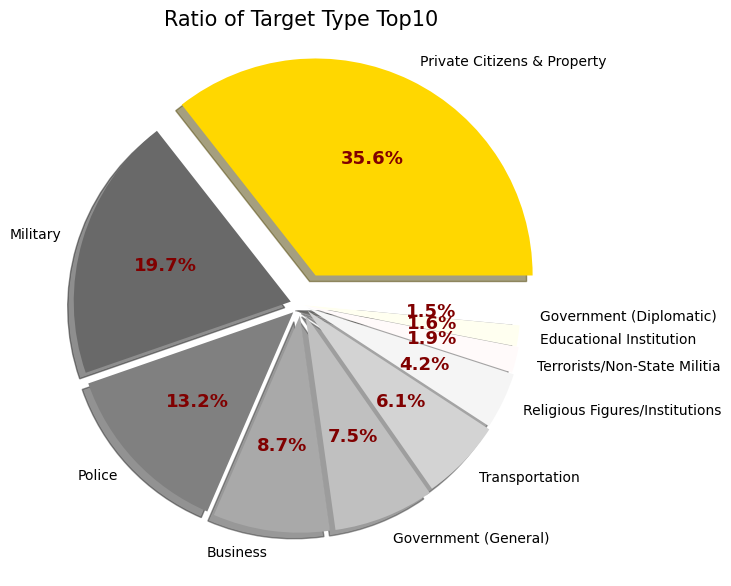

In [95]:
explode = [0.15, 0.051, 0.051, 0.051, 0.051, 0.04, 0.03, 0.02, 0.01, 0]
colors = ['gold', 'dimgray', 'gray', 'darkgray', 'silver', 'lightgray', 'whitesmoke', 'snow', 'ivory', 'w']

fig, ax = plt.subplots(figsize=(7, 10), subplot_kw=dict(aspect='equal'))

wedges, texts, autotexts = ax.pie(
	target_type_10['Ratio'].values, labels=target_type_10.index, autopct='%.1f%%',
	explode=explode, shadow=True, colors=colors
);
plt.setp(autotexts, size=13, weight="bold", color='maroon')
ax.set_title('Ratio of Target Type Top10', fontsize=15)
plt.show()

#### 👉 민간인 사상자 35.6%

- 그들의 목적을 이루기 위해 테러의 주된 대상이 민간인이라는 것이 참 슬픈 사실인 것 같다.

- 아이들을 인질로 납치하는 경우도 전체 테러건수의 5.9%에 해당하는 10,719건이나 되었다.

In [15]:
len(terror), terror['ishostkid'].sum(), round(terror['ishostkid'].sum()/len(terror) * 100, 1)


(181691, 10719.0, 5.9)